<a href="https://colab.research.google.com/github/Travis-Molnoskey/Final_Project/blob/main/linear_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
# Find the latest version of spark 3.0  from http://www-us.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.1'
spark_version = 'spark-2.4.7'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark


# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get

In [2]:
!pip install s3fs

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 7.2MB 22.6MB/s 
     |████████████████████████████████| 1.3MB 57.6MB/s 
     |████████████████████████████████| 143kB 39.0MB/s 
     |████████████████████████████████| 296kB 33.5MB/s 
     |████████████████████████████████| 143kB 75.0MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.2.0-cp36-none-any.whl size=45554 sha256=93aca041790d11f3c4370feb4ffe48bffc0cc6469641c80c3618c92ebdde2251
  Stored in directory: /root/.cache/pip/wheels/9a/47/92/5873782cddd0c32be41eb43475d1f7e532d420cfa30a89b988
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=3d522d3186393a16a40139810be89cf78068aed9c139bbac4d7bebba77ea7867
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built aiobotocore idna-ssl
ERROR: requests 2.23.0 has requirement url

In [35]:
import pandas as pd
import s3fs
df = pd.read_csv('s3://ucsd-diamond-project/diamonds.csv')
df

,id,carat,cut,color,clarity,depth,table_ratio,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
df["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}, inplace = True)
df["color"].replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D":7}, inplace = True)
df["clarity"].replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1":7, "IF":8}, inplace = True)
df

,id,carat,cut,color,clarity,depth,table_ratio,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
X = df[["carat","cut","color","clarity","depth","table_ratio","x","y","z"]]
y = df["price"].values.reshape(-1,1)
print(X.shape, y.shape)

(53940, 9) (53940, 1)


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.907052909615842
Testing Score: 0.9068514326187412


Text(0.5, 1.0, 'Residual Plot')

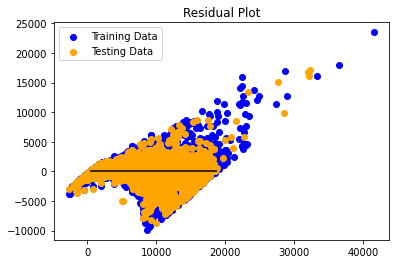

In [41]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [42]:
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 10710.64995
Feature: 1, Score: 123.05338
Feature: 2, Score: 323.93771
Feature: 3, Score: 502.76734
Feature: 4, Score: -80.17689
Feature: 5, Score: -27.26570
Feature: 6, Score: -854.46574
Feature: 7, Score: 28.69989
Feature: 8, Score: -14.03548
